In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from scipy import stats


In [3]:
# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=[
    'sepal_length', 'sepal_width', 'petal_length', 'petal_width'
])
df['species'] = iris.target
df['species'] = df['species'].map({0:'Setosa', 1:'Versicolor', 2:'Virginica'})

df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [6]:
#Descriptive Statistics
desc_stats = df.groupby('species')['sepal_length'].agg(
    mean='mean',
    median='median',
    std_dev='std'
)

desc_stats
desc_stats['std_dev'].idxmax()
#Virginica shows the highest variability in sepal length, indicating greater dispersion compared to other species.

'Virginica'

In [7]:
#Central Tendency & Dispersion (Petal Length)
petal_stats = df.groupby('species')['petal_length'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std'
)

petal_stats
df.groupby('species')['petal_length'].apply(lambda x: x.mode())
#The median differs from the mean when the data is skewed or contains outliers, as the median is more robust to extreme values.

species      
Setosa      0    1.4
            1    1.5
Versicolor  0    4.5
Virginica   0    5.1
Name: petal_length, dtype: float64

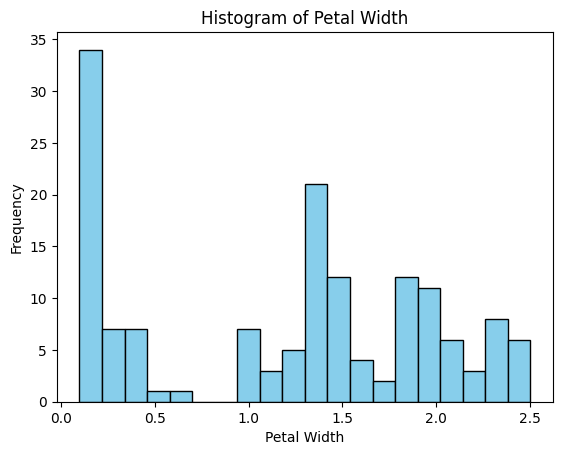

In [8]:
#Visualization
# Histogram – Petal Width (all species)
plt.figure()
plt.hist(df['petal_width'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Petal Width')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Width')
plt.savefig("petal_width_hist.png", dpi=300, bbox_inches='tight')
plt.show()


/tmp/ipython-input-120532589.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='sepal_length', data=df, palette="pastel")


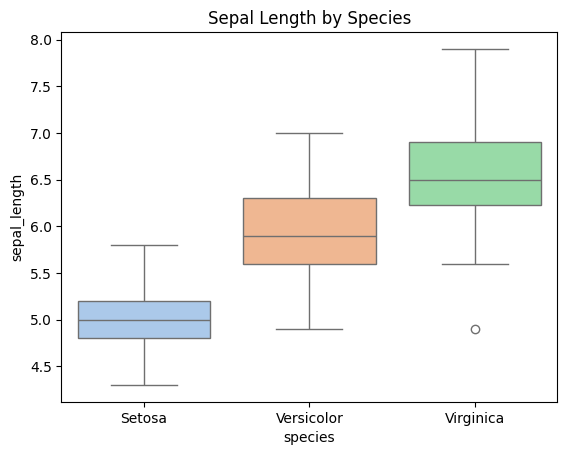

In [9]:
# Boxplot – Sepal Length by Species
plt.figure()
sns.boxplot(x='species', y='sepal_length', data=df, palette="pastel")
plt.title('Sepal Length by Species')
plt.savefig("sepal_length_boxplot.png", dpi=300, bbox_inches='tight')
plt.show()
#The boxplot better shows between-species differences because it displays median, spread, and outliers clearly.

In [10]:
#Distributions & Skewness
skewness = df.groupby('species')['petal_length'].apply(stats.skew)
print("Skewness of Petal Length by Species:")
display(skewness)

most_pos = skewness.idxmax()
most_neg = skewness.idxmin()
print(f"Most positively skewed: {most_pos}")
print(f"Most negatively skewed: {most_neg}")

#Positive skew indicates a longer right tail, while negative skew indicates a longer left tail in the distribution.

Skewness of Petal Length by Species:


,petal_length
species,
Setosa,0.103175
Versicolor,-0.588159
Virginica,0.532822


Most positively skewed: Virginica
Most negatively skewed: Versicolor


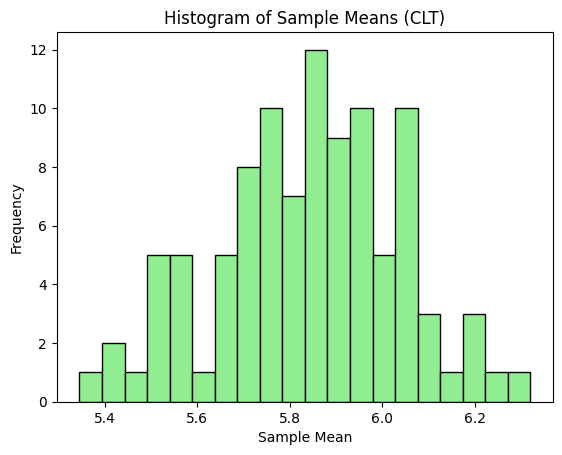

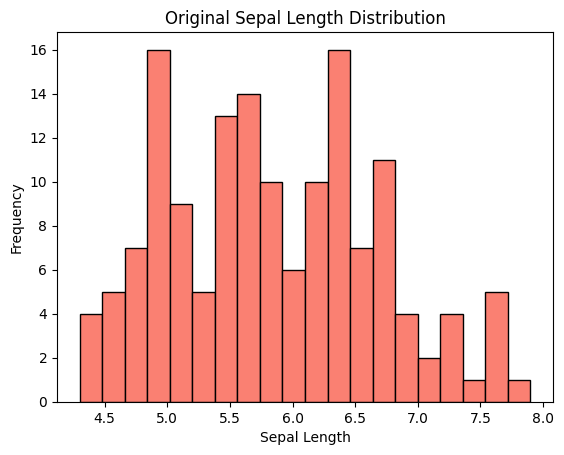

In [11]:
#Sampling & Central Limit Theorem (CLT)
np.random.seed(42)
sample_means = []

for _ in range(100):
    sample = np.random.choice(df['sepal_length'], size=20, replace=True)
    sample_means.append(sample.mean())

# Histogram of sample means
plt.figure()
plt.hist(sample_means, bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Means (CLT)')
plt.savefig("clt_sample_means.png", dpi=300, bbox_inches='tight')
plt.show()

# Histogram of original sepal length
plt.figure()
plt.hist(df['sepal_length'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.title('Original Sepal Length Distribution')
plt.savefig("original_sepal_length.png", dpi=300, bbox_inches='tight')
plt.show()

#The distribution of sample means is more symmetric and closer to normal, demonstrating the Central Limit Theorem.

Pearson correlation (r) = 0.87


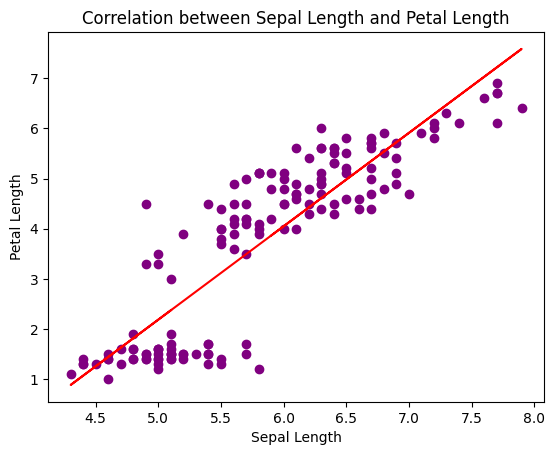

In [12]:
#Correlation – Sepal Length & Petal Length
corr, _ = stats.pearsonr(df['sepal_length'], df['petal_length'])
print(f"Pearson correlation (r) = {corr:.2f}")

# Scatter plot with best-fit line
plt.figure()
plt.scatter(df['sepal_length'], df['petal_length'], color='purple')
m, b = np.polyfit(df['sepal_length'], df['petal_length'], 1)
plt.plot(df['sepal_length'], m*df['sepal_length'] + b, color='red')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Correlation between Sepal Length and Petal Length')
plt.savefig("correlation_plot.png", dpi=300, bbox_inches='tight')
plt.show()
#There is a positive correlation: as sepal length increases, petal length also increases.

In [13]:
#Hypothesis Testing – t-Test (Setosa vs Versicolor)
setosa = df[df['species']=='Setosa']['petal_length']
versicolor = df[df['species']=='Versicolor']['petal_length']

t_stat, p_value = stats.ttest_ind(setosa, versicolor)
print(f"t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")
#Since p-value < 0.05, we reject the null hypothesis. Setosa and Versicolor have significantly different mean petal lengths.

t-statistic = -39.49, p-value = 0.0000


In [14]:
#Hypothesis Testing – ANOVA (3 Groups)
virginica = df[df['species']=='Virginica']['petal_width']

f_stat, p_val = stats.f_oneway(
    df[df['species']=='Setosa']['petal_width'],
    df[df['species']=='Versicolor']['petal_width'],
    df[df['species']=='Virginica']['petal_width']
)

print(f"F-statistic = {f_stat:.2f}, p-value = {p_val:.4f}")
#Since p-value < 0.05, petal width significantly differs across Setosa, Versicolor, and Virginica.

F-statistic = 960.01, p-value = 0.0000
